<a href="https://colab.research.google.com/github/AndreaCastiella/Convolutional-Neural-Networks-in-Tensorflow/blob/main/Course_2_Part_4_Lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
  
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

--2021-04-20 18:50:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   239MB/s    in 0.6s    

2021-04-20 18:50:18 (239 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-04-20 18:50:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

## Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [ ]:
import tensorflow as tf

We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers. 

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=8,
    epochs=100,
    verbose=1,
    validation_steps=8
)

Epoch 1/100
8/8 [==============================] - 27s 2s/step - loss: 0.6905 - acc: 0.5138 - val_loss: 0.6644 - val_acc: 0.5820
Epoch 2/100
8/8 [==============================] - 22s 3s/step - loss: 0.6835 - acc: 0.6008 - val_loss: 0.6495 - val_acc: 0.5742
Epoch 3/100
8/8 [==============================] - 22s 3s/step - loss: 0.6545 - acc: 0.6005 - val_loss: 0.6275 - val_acc: 0.5781
Epoch 4/100
8/8 [==============================] - 22s 3s/step - loss: 0.6478 - acc: 0.6507 - val_loss: 0.5617 - val_acc: 0.8164
Epoch 5/100
8/8 [==============================] - 22s 3s/step - loss: 0.6489 - acc: 0.6987 - val_loss: 0.5874 - val_acc: 0.6172
Epoch 6/100
8/8 [==============================] - 22s 3s/step - loss: 0.5813 - acc: 0.7636 - val_loss: 0.5837 - val_acc: 0.6250
Epoch 7/100
8/8 [==============================] - 22s 3s/step - loss: 0.5477 - acc: 0.7937 - val_loss: 0.5006 - val_acc: 0.7227
Epoch 8/100
8/8 [==============================] - 21s 3s/step - loss: 0.6365 - acc: 0.6423 - val

<function matplotlib.pyplot.show>

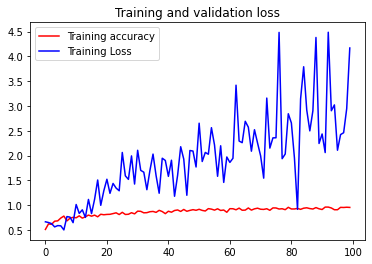

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['loss'],
loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show